In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [42]:
dataset = pd.read_csv("data-pajak-parkir-di-dki-jakarta-desember-2019-2021.csv")
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [43]:
print(x)

[[         12  3970874005]
 [         12 39708538732]
 [         12 10510131146]
 [         12 10521910232]
 [         12  3464173701]
 [         12  3970272321]
 [         12  1051032312]
 [         12   105163473]
 [         12 10510353214]
 [         12  3462384301]
 [         12  3975372835]
 [         12  1042571146]
 [         12    13213146]
 [         12   198473146]
 [         12   323213201]]


In [44]:
print(y)

[1 1 1 1 1 1 0 1 1 0 1 0 1 0 1]


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [46]:
print(x_train)

[[         12   323213201]
 [         12  3464173701]
 [         12 10510131146]
 [         12   198473146]
 [         12  3975372835]
 [         12   105163473]
 [         12  1042571146]
 [         12 10521910232]
 [         12  3970874005]
 [         12  3970272321]
 [         12    13213146]]


In [47]:
print(x_test)

[[         12 39708538732]
 [         12  1051032312]
 [         12 10510353214]
 [         12  3462384301]]


In [48]:
print (y_train)

[1 1 1 0 1 1 0 1 1 1 1]


In [49]:
print (y_test)

[1 0 1 0]


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [51]:
print (x_train)

[[ 0.00000000e+00 -8.50832841e-01]
 [ 0.00000000e+00  2.59692509e-04]
 [ 0.00000000e+00  1.90947242e+00]
 [ 0.00000000e+00 -8.84633116e-01]
 [ 0.00000000e+00  1.38777119e-01]
 [ 0.00000000e+00 -9.09916836e-01]
 [ 0.00000000e+00 -6.55911518e-01]
 [ 0.00000000e+00  1.91266415e+00]
 [ 0.00000000e+00  1.37558091e-01]
 [ 0.00000000e+00  1.37395055e-01]
 [ 0.00000000e+00 -9.34832220e-01]]


In [52]:
print (x_test)

[[ 0.00000000e+00  9.82123912e+00]
 [ 0.00000000e+00 -6.53618832e-01]
 [ 0.00000000e+00  1.90953260e+00]
 [ 0.00000000e+00 -2.25173500e-04]]


In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


GaussianNB()

In [54]:
y_pred = classifier.predict(x_test)


In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1 1]
 [0 2]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


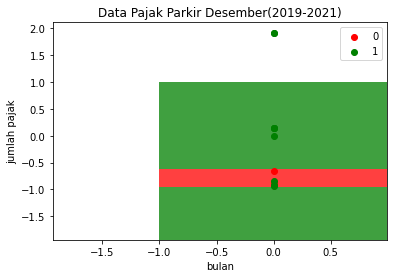

In [56]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Data Pajak Parkir Desember(2019-2021)')
plt.xlabel('bulan')
plt.ylabel('jumlah pajak')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


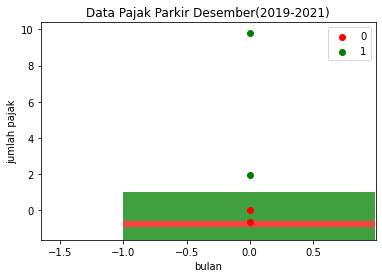

In [57]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01), 
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 0].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red' , 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set==j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Data Pajak Parkir Desember(2019-2021)')
plt.xlabel('bulan')
plt.ylabel('jumlah pajak')
plt.legend()
plt.show()